C:\Users\porok\AppData\Local\Temp\ipykernel_13864\335530670.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


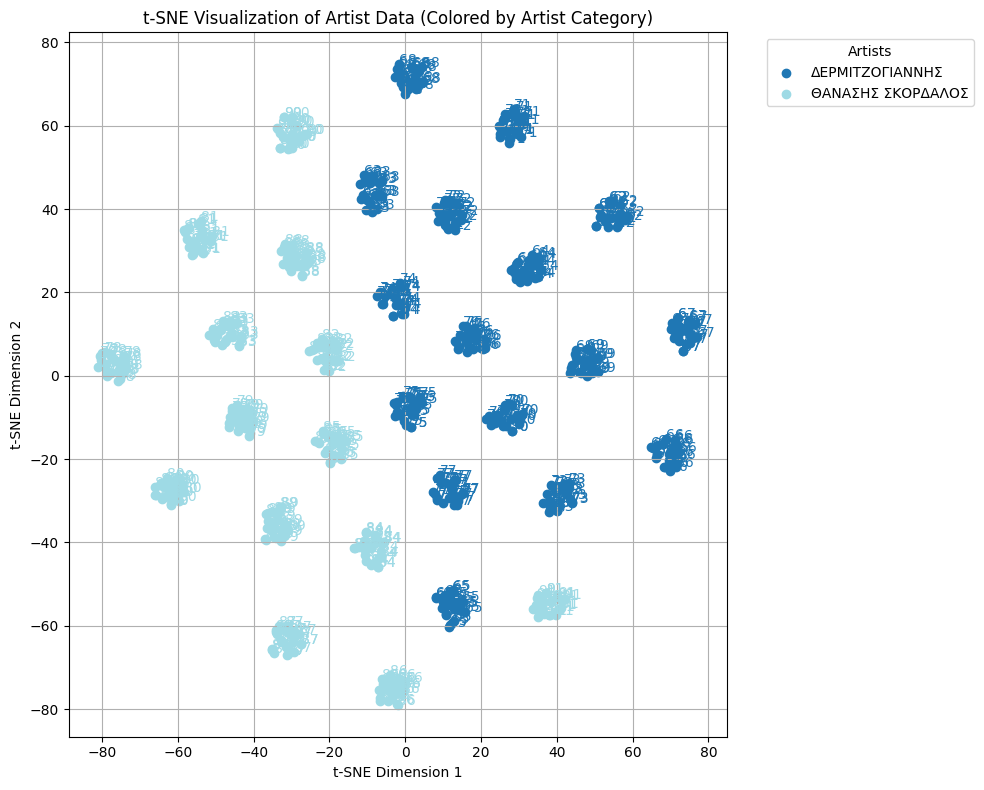

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file (assuming header row)
data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]


tsne = TSNE(n_components=2, perplexity=6, random_state=42) 
X_2d = tsne.fit_transform(numerical_data)

# Create a color map for artist categories with enhanced color scheme
unique_artists = artist_category.unique()
num_colors = len(unique_artists)
color_map = plt.cm.get_cmap('tab20', num_colors)  

# Plot the data with different colors for each artist
plt.figure(figsize=(10, 8))
for i, artist in enumerate(unique_artists):
    artist_indices = artist_category == artist
    plt.scatter(X_2d[artist_indices, 0],
                X_2d[artist_indices, 1],
                color=color_map(i / num_colors), label=artist)


    for j, idx in enumerate(data[artist_indices].index):
        plt.annotate(str(data.loc[idx, 'label']), (X_2d[idx, 0], X_2d[idx, 1]), color=color_map(i / num_colors))


plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Artist Data (Colored by Artist Category)")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3055796249.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


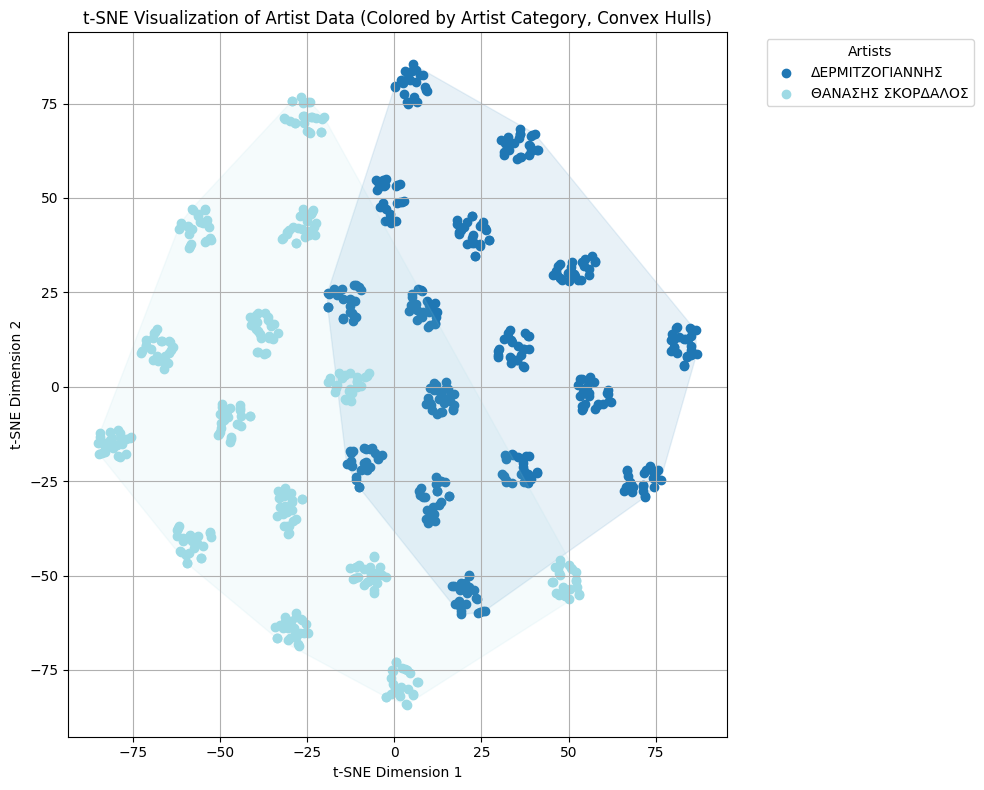

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Load data from CSV file (assuming header row)
data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]


tsne = TSNE(n_components=2, perplexity=4, random_state=42) 
X_2d = tsne.fit_transform(numerical_data)

# Create a color map for artist categories with enhanced color scheme
unique_artists = artist_category.unique()
num_colors = len(unique_artists)
color_map = plt.cm.get_cmap('tab20', num_colors)  

# Plot the data with different colors for each artist
plt.figure(figsize=(10, 8))
for i, artist in enumerate(unique_artists):
    artist_indices = artist_category == artist
    artist_data = X_2d[artist_indices]
    artist_labels = artist_category[artist_indices]  # Use correct labels for each artist

    plt.scatter(artist_data[:, 0], artist_data[:, 1], color=color_map(i / num_colors), label=artist)

    if len(artist_data) >= 3:  # Check if there are enough points for convex hull
            try:
                hull = ConvexHull(artist_data)
                plt.fill(artist_data[hull.vertices, 0], artist_data[hull.vertices, 1], 
                        color=color_map(i / num_colors), alpha=0.1)
            except Exception as e:  # Catch potential Qhull errors
                print(f"Error calculating convex hull for artist {artist}: {e}")

# Add labels and title
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Artist Data (Colored by Artist Category, Convex Hulls)")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(True)
plt.tight_layout()
plt.show()

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation: 0.0


C:\Users\porok\AppData\Local\Temp\ipykernel_13864\1794388017.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


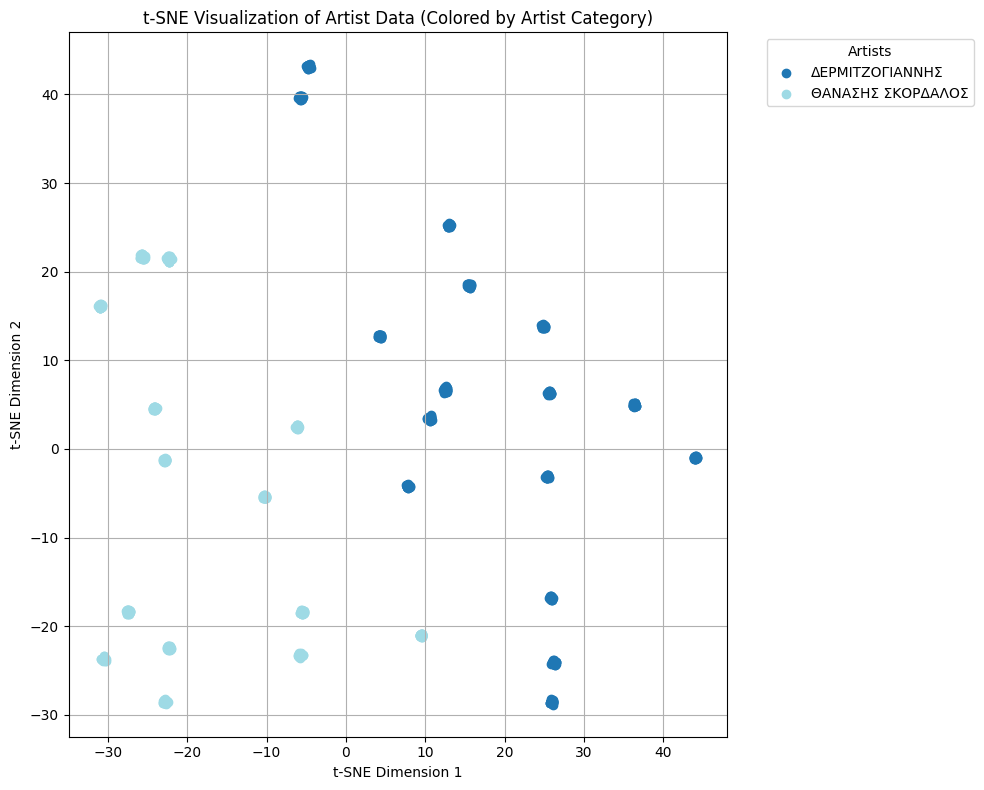

In [43]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, perplexity=31, random_state=42) 
X_2d = tsne.fit_transform(numerical_data)

# Create and train SVM classifier
svm_model = SVC(kernel='sigmoid', C=1)  

# Perform k-fold cross-validation
scores = cross_val_score(svm_model, X_2d, artist_category, cv=5, scoring='accuracy') 

# Print cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Create a color map for artist categories with enhanced color scheme
unique_artists = artist_category.unique()
num_colors = len(unique_artists)
color_map = plt.cm.get_cmap('tab20', num_colors)  

# Plot the data with different colors for each artist
plt.figure(figsize=(10, 8))
for i, artist in enumerate(unique_artists):
    artist_indices = artist_category == artist
    plt.scatter(X_2d[artist_indices, 0],
                X_2d[artist_indices, 1],
                color=color_map(i / num_colors),
                label=artist)


plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of Artist Data (Colored by Artist Category)")


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.grid(True)
plt.tight_layout()
plt.show()

Perplexity: 5
Cross-validation scores: [0.8        0.93333333 1.         0.8        0.70666667]
Mean accuracy: 0.8480000000000001
Standard deviation: 0.10485121734046667
------------------------------
Perplexity: 10
Cross-validation scores: [0.97333333 0.70666667 0.83333333 0.82       0.8       ]
Mean accuracy: 0.8266666666666668
Standard deviation: 0.08568676806965136
------------------------------
Perplexity: 12
Cross-validation scores: [0.81333333 0.76666667 0.76666667 0.83333333 0.49333333]
Mean accuracy: 0.7346666666666667
Standard deviation: 0.1234611949831471
------------------------------
Perplexity: 13
Cross-validation scores: [0.83333333 0.9        0.76666667 0.83333333 0.56      ]
Mean accuracy: 0.7786666666666667
Standard deviation: 0.11718172022783908
------------------------------


C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3069634693.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


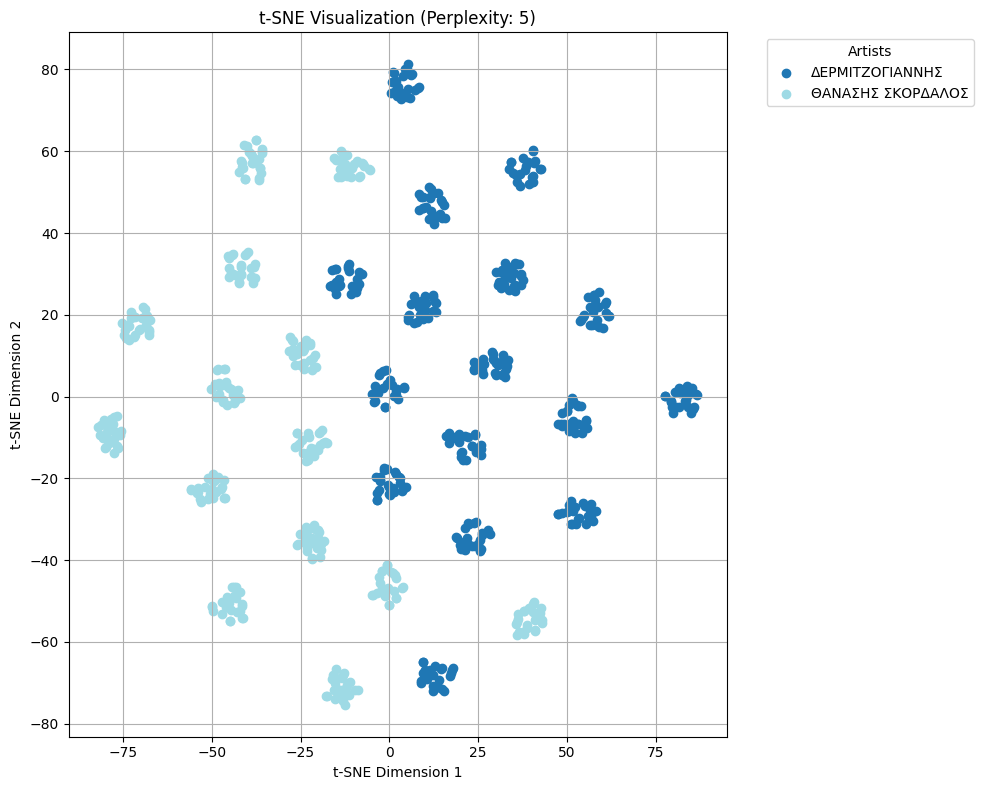

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3069634693.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


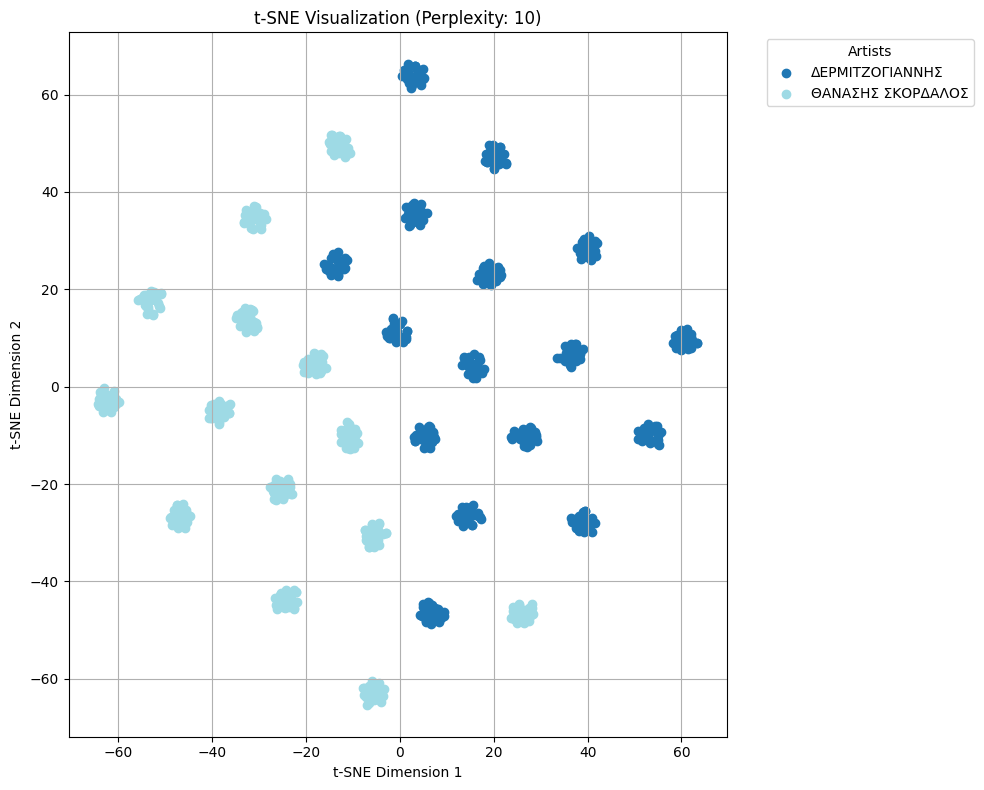

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3069634693.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


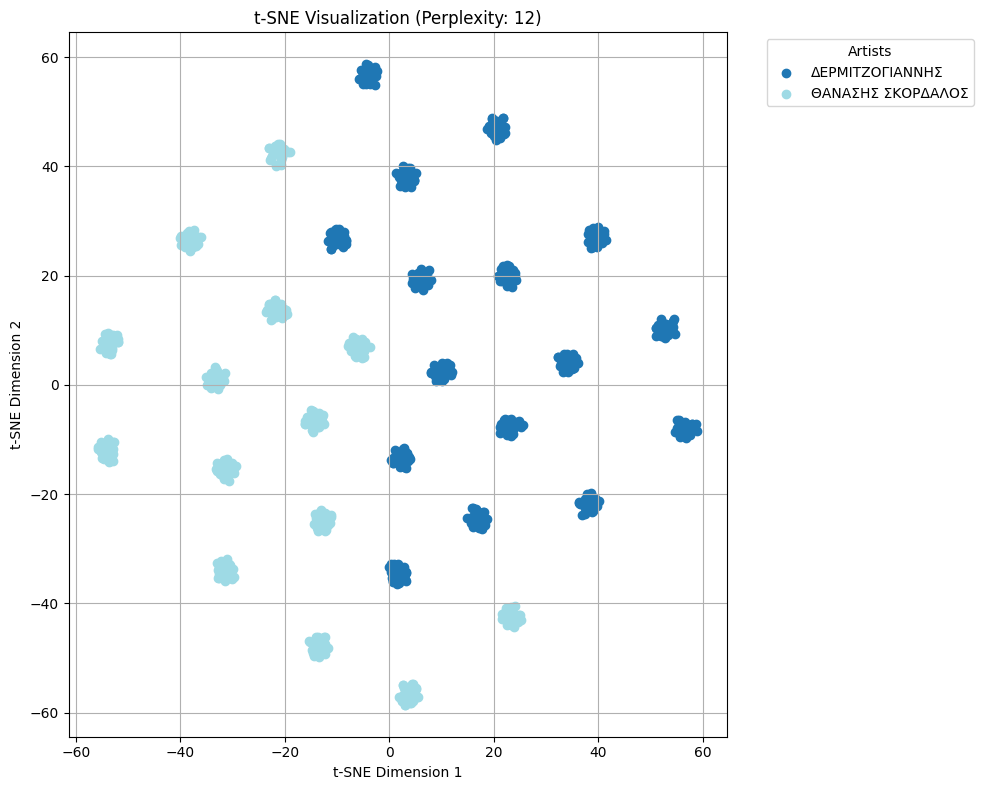

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3069634693.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


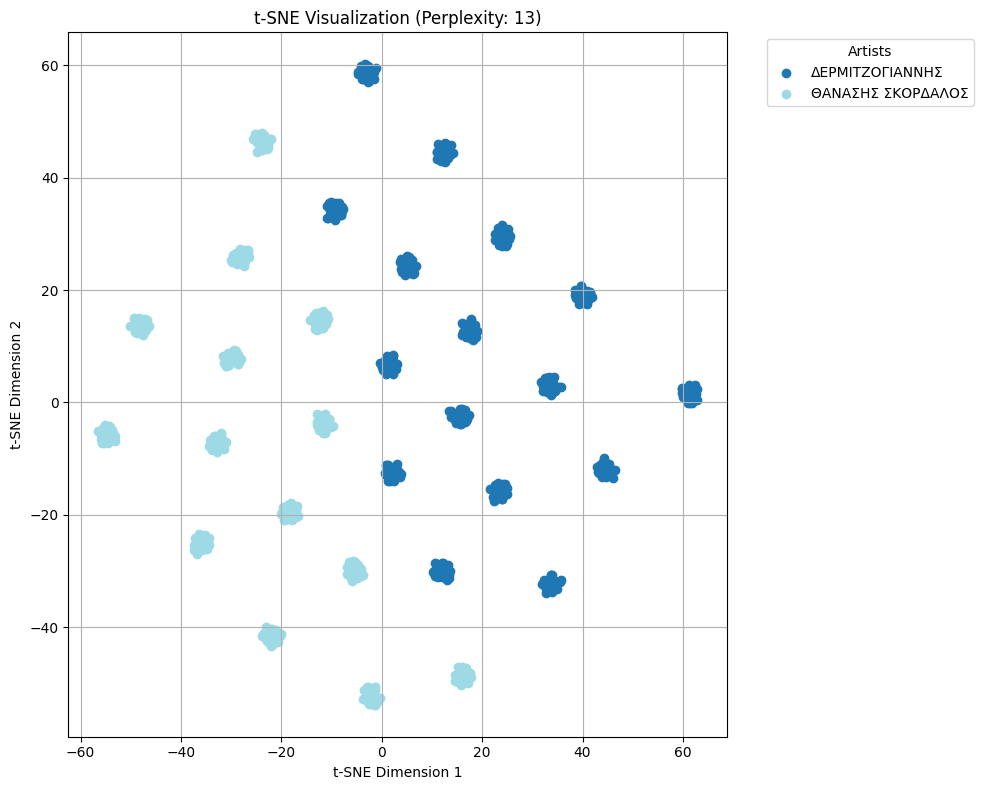

In [54]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file (assuming header row)
data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]

# Define a function to perform k-fold cross-validation with different perplexity values
def evaluate_perplexity(perplexity_values):
  cv_scores = {}
  for perplexity in perplexity_values:
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_2d = tsne.fit_transform(numerical_data)


    svm_model = SVC(kernel='sigmoid', C=1)  

    # Perform k-fold cross-validation
    scores = cross_val_score(svm_model, X_2d, artist_category, cv=5, scoring='accuracy')
    cv_scores[perplexity] = scores

  return cv_scores


perplexity_values = [5, 10,12,13]  # Adjust this list as needed
cv_results = evaluate_perplexity(perplexity_values)

# Print cross-validation results for each perplexity
for perplexity, scores in cv_results.items():
  print(f"Perplexity: {perplexity}")
  print("Cross-validation scores:", scores)
  print("Mean accuracy:", scores.mean())
  print("Standard deviation:", scores.std())
  print("-" * 30)  # Separator between perplexity results


selected_perplexities = [5, 10,12,13]  
for perplexity in selected_perplexities:
  # Perform t-SNE dimensionality reduction
  tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
  X_2d = tsne.fit_transform(numerical_data)

  # Create a color map for artist categories with enhanced color scheme
  unique_artists = artist_category.unique()
  num_colors = len(unique_artists)
  color_map = plt.cm.get_cmap('tab20', num_colors) 

  # Plot the data with different colors for each artist
  plt.figure(figsize=(10, 8))
  for i, artist in enumerate(unique_artists):
    artist_indices = artist_category == artist
    plt.scatter(X_2d[artist_indices, 0],
                X_2d[artist_indices, 1],
                color=color_map(i / num_colors),
                label=artist)


  plt.xlabel("t-SNE Dimension 1")
  plt.ylabel("t-SNE Dimension 2")
  plt.title(f"t-SNE Visualization (Perplexity: {perplexity})")


  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys(), title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')


  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]


X_train, X_test, y_train, y_test = train_test_split(
    numerical_data, artist_category, test_size=0.2, random_state=42
)

# Define a list of perplexity values to evaluate
perplexity_values = [5,6,7,8,9,10,11,12,13,14, 15,16,17,18,19, 20, 30]  # Adjust this list as needed

# Loop through different perplexity values
for perplexity in perplexity_values:
  # Perform t-SNE dimensionality reduction on training data
  tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42) 
  X_train_2d = tsne.fit_transform(X_train) 


  tsne_test = TSNE(n_components=2, perplexity=perplexity, random_state=42) 
  X_test_2d = tsne_test.fit_transform(X_test) 

  # Create and train SVM classifier on training data
  svm_model = SVC(kernel='sigmoid', C=1)  
  svm_model.fit(X_train_2d, y_train)


  y_pred = svm_model.predict(X_test_2d)


  accuracy = accuracy_score(y_test, y_pred)
  print(f"Perplexity: {perplexity}, Test Accuracy:", accuracy)


Perplexity: 5, Test Accuracy: 0.5333333333333333
Perplexity: 6, Test Accuracy: 0.78
Perplexity: 7, Test Accuracy: 0.5266666666666666
Perplexity: 8, Test Accuracy: 0.49333333333333335
Perplexity: 9, Test Accuracy: 0.38
Perplexity: 10, Test Accuracy: 0.6266666666666667
Perplexity: 11, Test Accuracy: 0.7466666666666667
Perplexity: 12, Test Accuracy: 0.96
Perplexity: 13, Test Accuracy: 0.96
Perplexity: 14, Test Accuracy: 0.8666666666666667
Perplexity: 15, Test Accuracy: 0.4666666666666667
Perplexity: 16, Test Accuracy: 0.8066666666666666
Perplexity: 17, Test Accuracy: 0.3933333333333333
Perplexity: 18, Test Accuracy: 0.19333333333333333
Perplexity: 19, Test Accuracy: 0.18
Perplexity: 20, Test Accuracy: 0.7466666666666667
Perplexity: 30, Test Accuracy: 0.2


Early STOPPING

Perplexity: 1, Test Accuracy: 0.4
Perplexity: 2, Test Accuracy: 0.47333333333333333
Perplexity: 3, Test Accuracy: 0.5066666666666667
Perplexity: 4, Test Accuracy: 0.7
Perplexity: 5, Test Accuracy: 0.56
Perplexity: 6, Test Accuracy: 0.78
Perplexity: 7, Test Accuracy: 0.58
Perplexity: 8, Test Accuracy: 0.68
Perplexity: 9, Test Accuracy: 0.4866666666666667
Perplexity: 10, Test Accuracy: 0.78
Perplexity: 11, Test Accuracy: 0.7466666666666667
Perplexity: 12, Test Accuracy: 0.96
Perplexity: 13, Test Accuracy: 0.9266666666666666
Perplexity: 14, Test Accuracy: 0.9266666666666666
Perplexity: 15, Test Accuracy: 0.17333333333333334
Perplexity: 16, Test Accuracy: 0.5933333333333334
Perplexity: 17, Test Accuracy: 0.54
Perplexity: 18, Test Accuracy: 0.42
Perplexity: 19, Test Accuracy: 0.4666666666666667
Perplexity: 20, Test Accuracy: 0.9666666666666667
Perplexity: 21, Test Accuracy: 0.10666666666666667
Perplexity: 22, Test Accuracy: 0.18666666666666668
Perplexity: 23, Test Accuracy: 0.04
Perplexity:

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\2953644513.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)


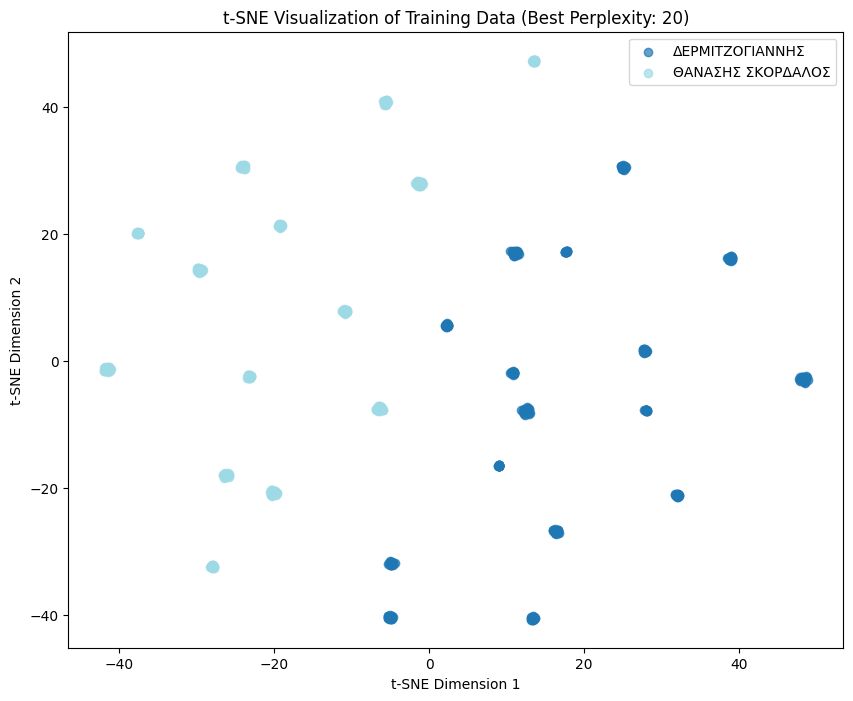

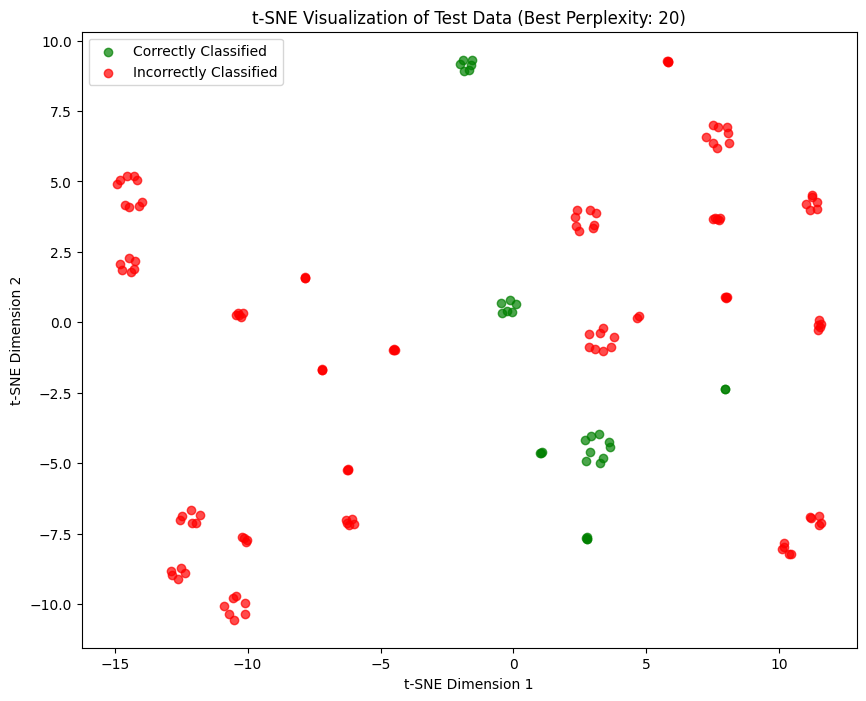

In [59]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    numerical_data, artist_category, test_size=0.2, random_state=42
)

# Define a function to perform t-SNE and SVM with early stopping
def train_model(perplexity):
    """
    Trains an SVM model on t-SNE transformed data with early stopping.

    Args:
        perplexity: Perplexity value for t-SNE.

    Returns:
        accuracy: Test accuracy of the trained model.
        X_train_2d: t-SNE transformed training data
        X_test_2d: t-SNE transformed test data
    """

    # Perform t-SNE dimensionality reduction on training data
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_train_2d = tsne.fit_transform(X_train)


    tsne_test = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_test_2d = tsne_test.fit_transform(X_test)


    param_grid = {'C': [0.1, 1, 10, 100]} 

    # Create SVM model
    svm_model = SVC(kernel='sigmoid') 

    # Perform GridSearchCV with early stopping (using cross-validation within GridSearchCV)
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5) 
    grid_search.fit(X_train_2d, y_train)

    # Predict labels for the test data
    y_pred = grid_search.best_estimator_.predict(X_test_2d)

    # Evaluate model performance on the test set
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, X_train_2d, X_test_2d

# Define perplexity values to evaluate
perplexity_values = list(range(1, 32)) 

# Evaluate models with different perplexities
best_accuracy = 0
best_perplexity = None
best_X_train_2d = None
best_X_test_2d = None

for perplexity in perplexity_values:
    accuracy, X_train_2d, X_test_2d = train_model(perplexity)
    print(f"Perplexity: {perplexity}, Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_perplexity = perplexity
        best_X_train_2d = X_train_2d
        best_X_test_2d = X_test_2d

print(f"Best Perplexity: {best_perplexity}, Best Accuracy: {best_accuracy}")

# Visualize Training Data with Best Perplexity
plt.figure(figsize=(10, 8))
unique_artists = np.unique(y_train)
num_colors = len(unique_artists)
color_map = plt.cm.get_cmap('tab20', num_colors)

for i, artist in enumerate(unique_artists):
    artist_indices = y_train == artist
    plt.scatter(best_X_train_2d[artist_indices, 0], best_X_train_2d[artist_indices, 1], 
                color=color_map(i / num_colors), label=artist, alpha=0.7)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title(f"t-SNE Visualization of Training Data (Best Perplexity: {best_perplexity})")
plt.legend()
plt.show()

# Visualize Test Data with Best Perplexity 
plt.figure(figsize=(10, 8))

# Plot correctly classified points
correct_indices = y_pred == y_test
plt.scatter(best_X_test_2d[correct_indices, 0], best_X_test_2d[correct_indices, 1], 
            color='green', label='Correctly Classified', alpha=0.7)

# Plot incorrectly classified points
incorrect_indices = y_pred != y_test
plt.scatter(best_X_test_2d[incorrect_indices, 0], best_X_test_2d[incorrect_indices, 1], 
            color='red', label='Incorrectly Classified', alpha=0.7)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title(f"t-SNE Visualization of Test Data (Best Perplexity: {best_perplexity})")
plt.legend()
plt.show()

Perplexity: 1
Cross-validation scores: [0.96       0.82       0.74       0.58666667 0.53333333]
Mean accuracy: 0.728
Standard deviation: 0.15511429477789737
------------------------------
Perplexity: 2
Cross-validation scores: [0.70666667 0.96666667 1.         1.         0.44666667]
Mean accuracy: 0.8240000000000001
Standard deviation: 0.21838192843426096
------------------------------
Perplexity: 3
Cross-validation scores: [0.83333333 0.86666667 0.96666667 0.82666667 0.48      ]
Mean accuracy: 0.7946666666666667
Standard deviation: 0.16510737247150548
------------------------------
Perplexity: 4
Cross-validation scores: [0.88666667 0.95333333 0.94666667 0.77333333 0.8       ]
Mean accuracy: 0.8720000000000001
Standard deviation: 0.07392488680335527
------------------------------
Perplexity: 5
Cross-validation scores: [1.         1.         0.71333333 0.68       0.79333333]
Mean accuracy: 0.8373333333333333
Standard deviation: 0.13783081416480616
------------------------------
Perplexi

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


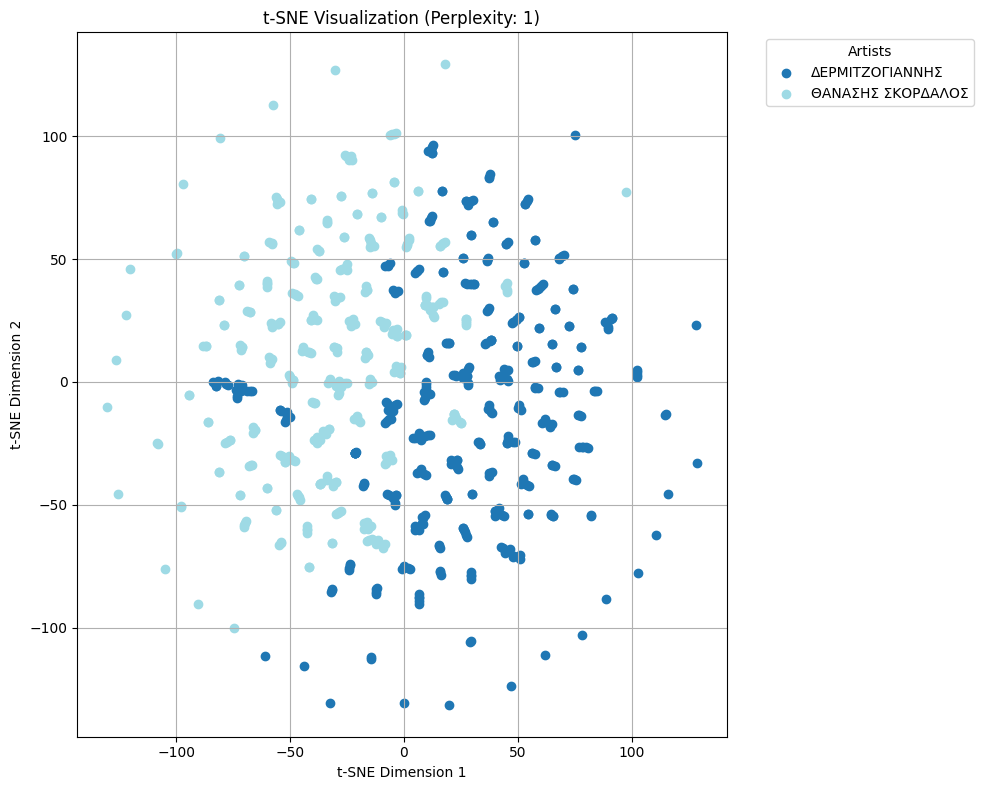

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


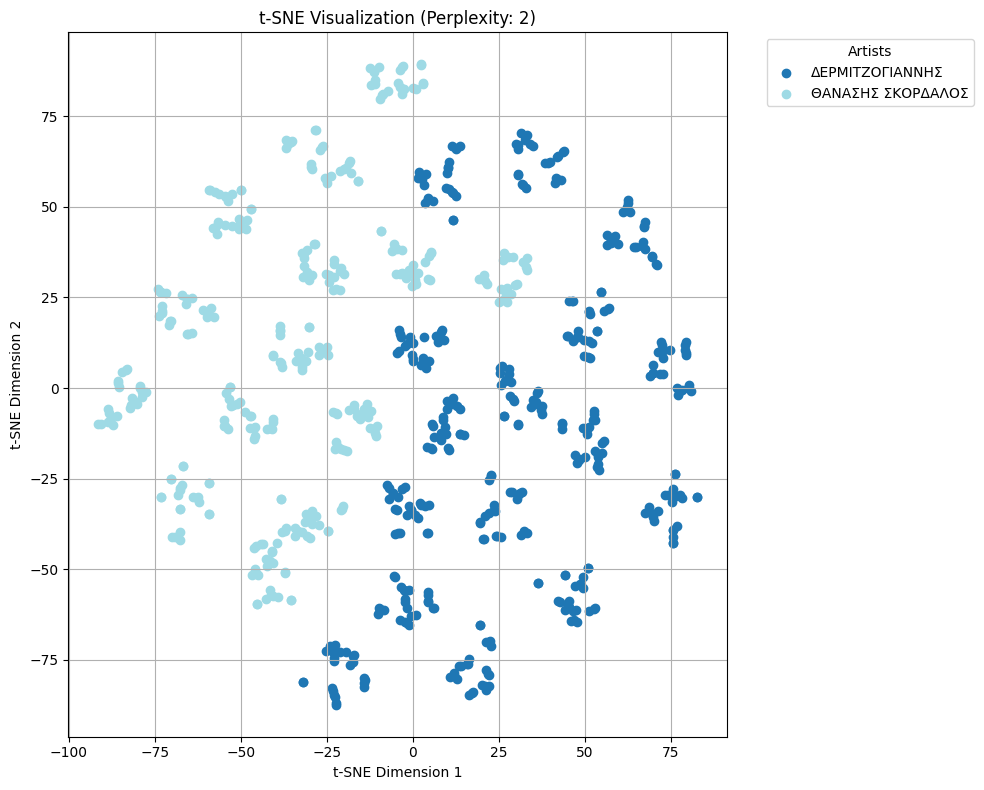

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


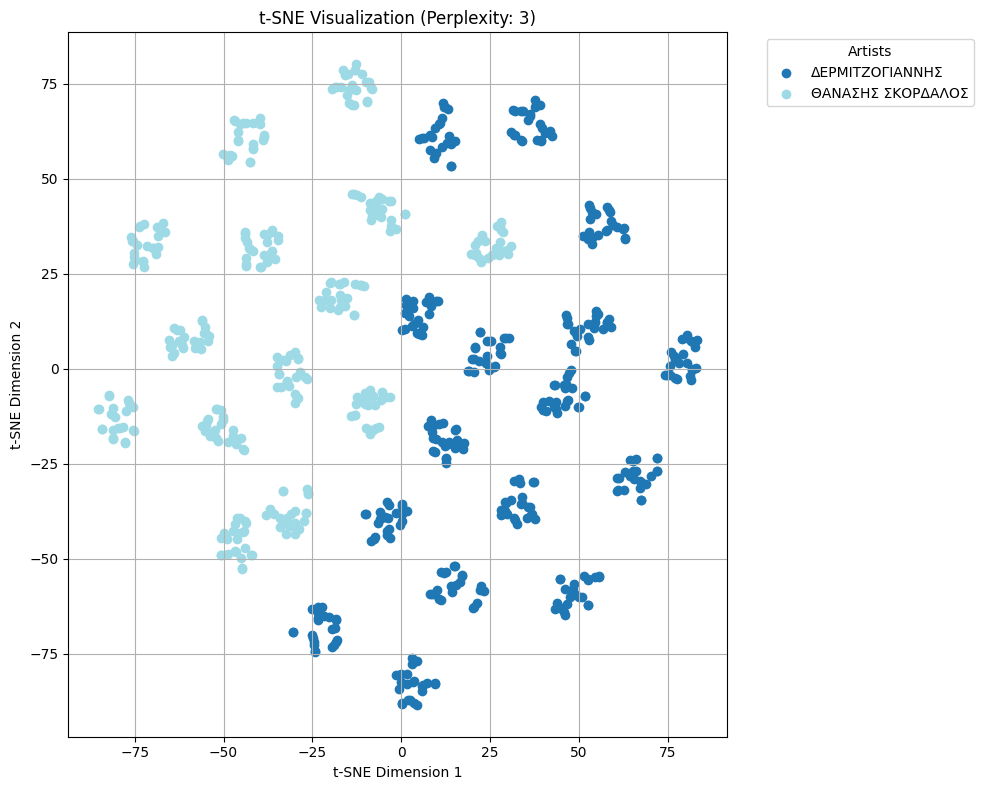

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


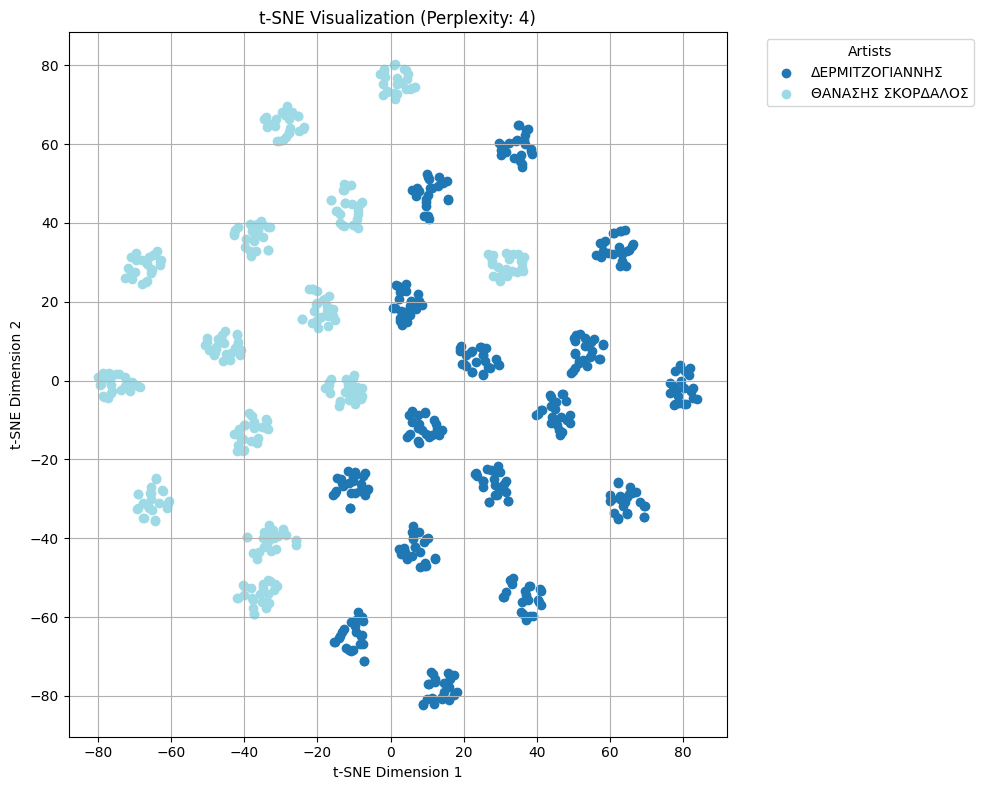

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


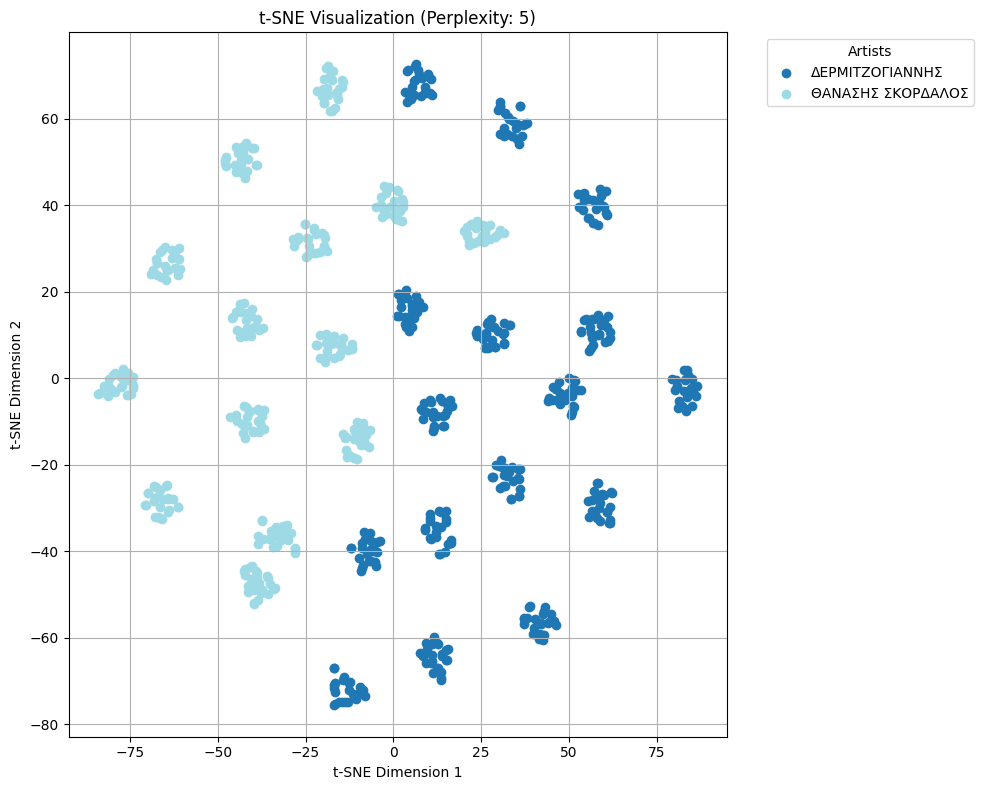

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


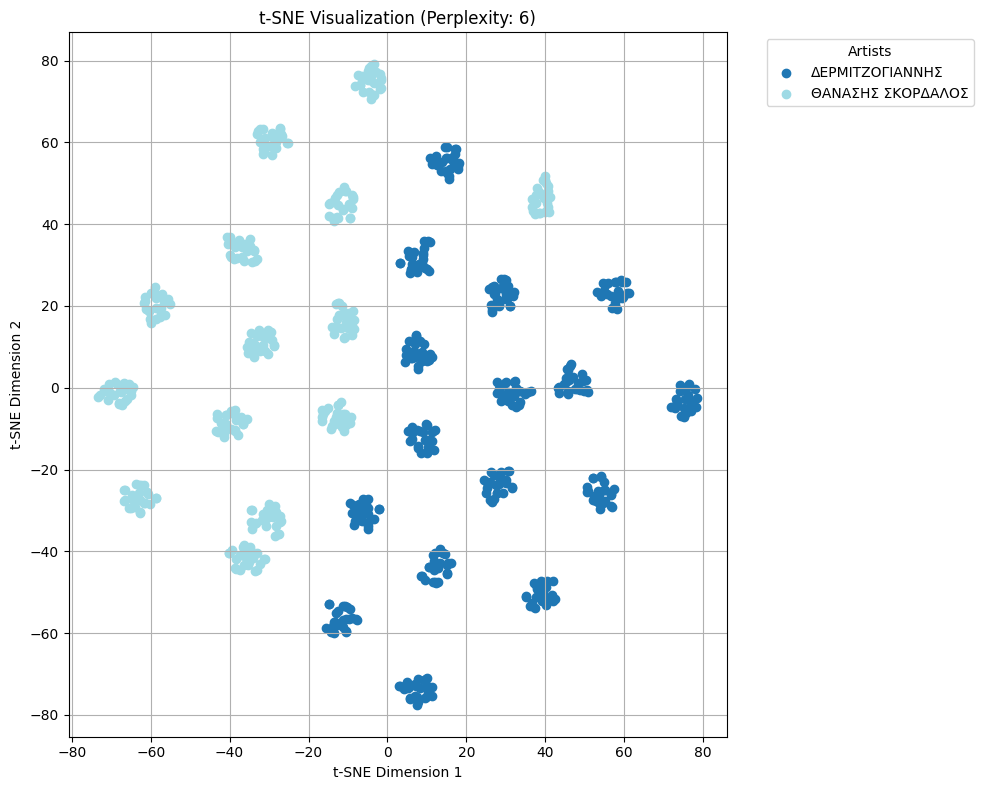

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


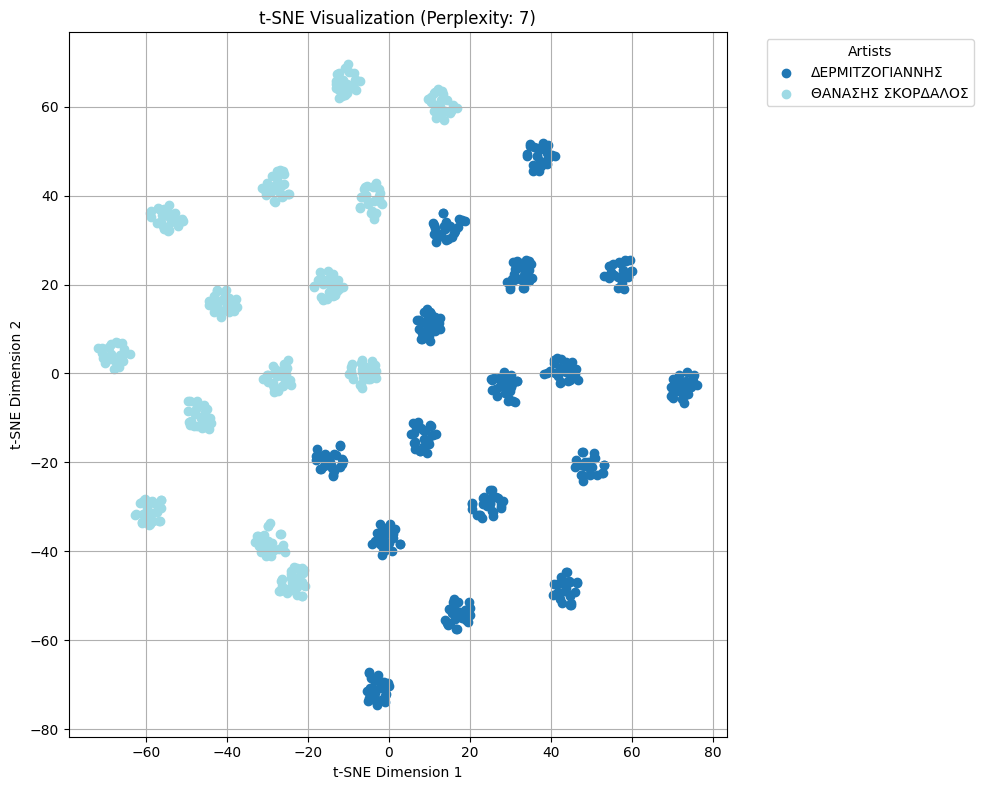

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


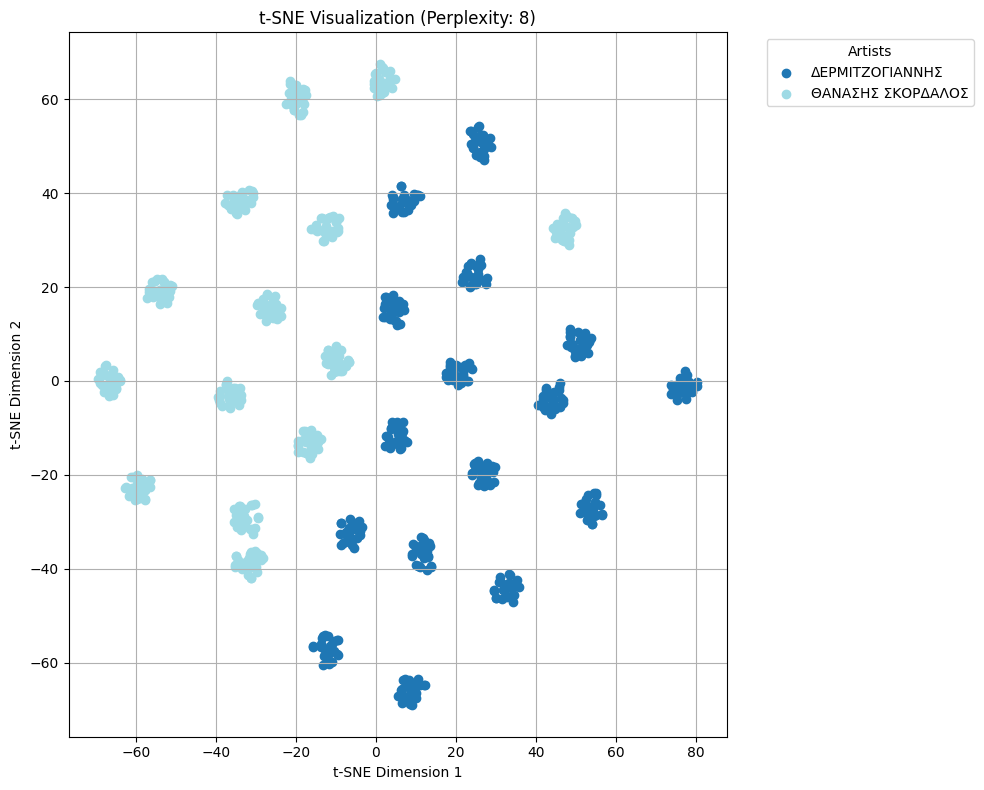

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


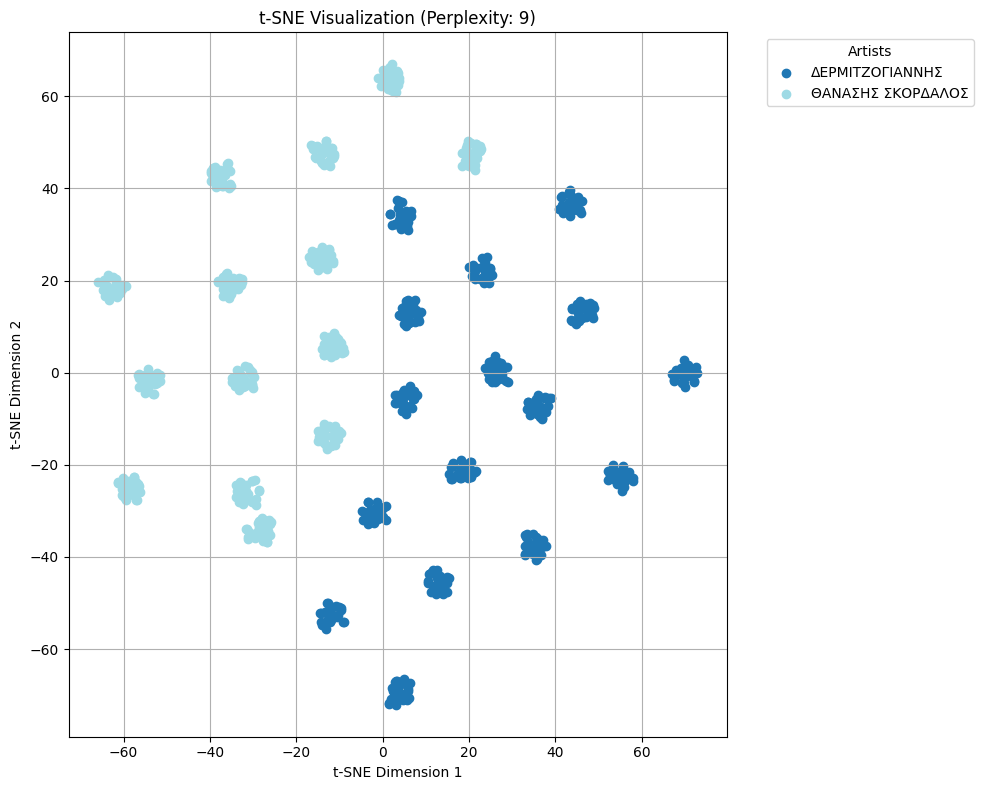

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\3786076029.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)  # Use 'tab20' for 20+ distinct colors


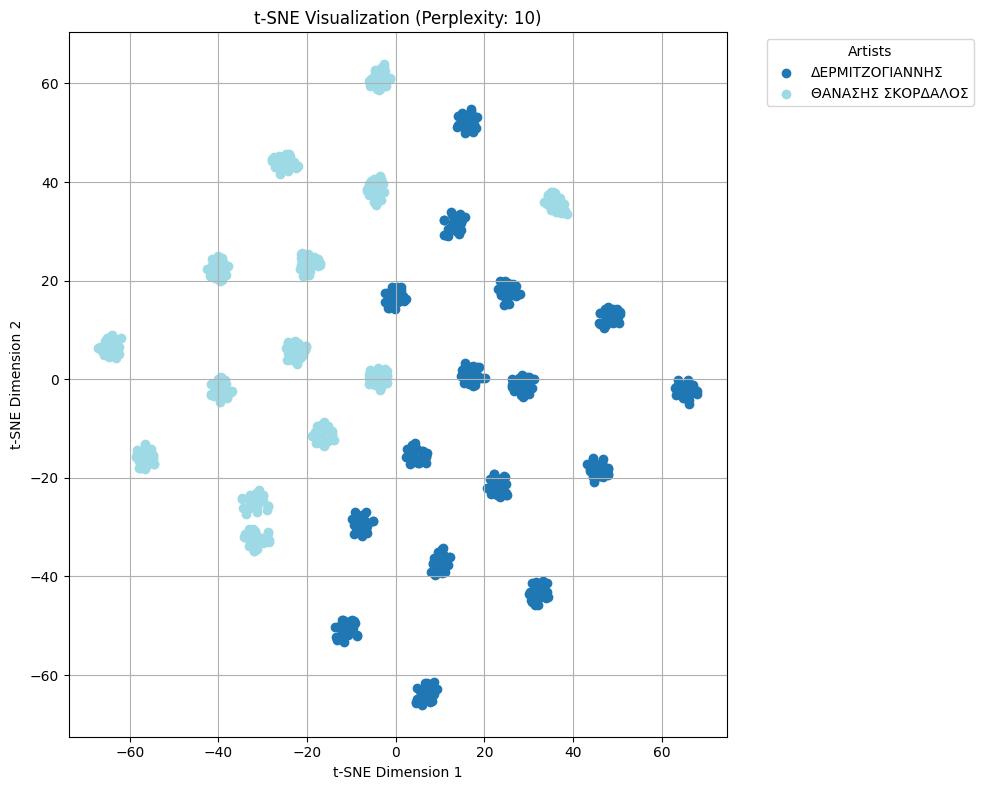

In [141]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]

# Define a function to perform k-fold cross-validation with different perplexity values
def evaluate_perplexity(perplexity_values):
  cv_scores = {}
  for perplexity in perplexity_values:
    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_2d = tsne.fit_transform(numerical_data)

    # Create and train SVM classifier
    svm_model = SVC(kernel='sigmoid', C=1) 

    # Perform k-fold cross-validation
    scores = cross_val_score(svm_model, X_2d, artist_category, cv=5, scoring='accuracy')
    cv_scores[perplexity] = scores

  return cv_scores

# Evaluate perplexity values (e.g., try 30, 31, and other values in a range)
perplexity_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Adjust this list as needed

cv_results = evaluate_perplexity(perplexity_values)

# Print cross-validation results for each perplexity
for perplexity, scores in cv_results.items():
  print(f"Perplexity: {perplexity}")
  print("Cross-validation scores:", scores)
  print("Mean accuracy:", scores.mean())
  print("Standard deviation:", scores.std())
  print("-" * 30)  # Separator between perplexity results


selected_perplexities = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Choose perplexities to visualize
for perplexity in selected_perplexities:
  # Perform t-SNE dimensionality reduction
  tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
  X_2d = tsne.fit_transform(numerical_data)

  # Create a color map for artist categories with enhanced color scheme
  unique_artists = artist_category.unique()
  num_colors = len(unique_artists)
  color_map = plt.cm.get_cmap('tab20', num_colors)

  # Plot the data with different colors for each artist
  plt.figure(figsize=(10, 8))
  for i, artist in enumerate(unique_artists):
    artist_indices = artist_category == artist
    plt.scatter(X_2d[artist_indices, 0],
                X_2d[artist_indices, 1],
                color=color_map(i / num_colors),
                label=artist)

  # Add labels and title
  plt.xlabel("t-SNE Dimension 1")
  plt.ylabel("t-SNE Dimension 2")
  plt.title(f"t-SNE Visualization (Perplexity: {perplexity})")

  # Enhance legend appearance and layout (optional)
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys(), title="Artists", bbox_to_anchor=(1.05, 1), loc='upper left')

  # Show the plot
  plt.grid(True)
  plt.tight_layout()
  plt.show()

Perplexity: 1, Test Accuracy: 0.5866666666666667
Perplexity: 2, Test Accuracy: 0.5822222222222222
Perplexity: 3, Test Accuracy: 0.5111111111111111
Perplexity: 4, Test Accuracy: 0.6266666666666667
Perplexity: 5, Test Accuracy: 0.4622222222222222
Perplexity: 6, Test Accuracy: 0.7644444444444445
Perplexity: 7, Test Accuracy: 0.6222222222222222
Perplexity: 8, Test Accuracy: 0.8622222222222222
Perplexity: 9, Test Accuracy: 0.76
Perplexity: 10, Test Accuracy: 0.9244444444444444
Perplexity: 11, Test Accuracy: 0.7466666666666667
Perplexity: 12, Test Accuracy: 0.6222222222222222
Perplexity: 13, Test Accuracy: 0.7111111111111111
Perplexity: 14, Test Accuracy: 0.5866666666666667
Perplexity: 15, Test Accuracy: 0.92
Perplexity: 16, Test Accuracy: 0.3022222222222222
Perplexity: 17, Test Accuracy: 0.6488888888888888
Perplexity: 18, Test Accuracy: 0.4666666666666667
Perplexity: 19, Test Accuracy: 0.9511111111111111
Perplexity: 20, Test Accuracy: 0.92
Perplexity: 21, Test Accuracy: 0.92
Perplexity: 22,

C:\Users\porok\AppData\Local\Temp\ipykernel_13864\2021387333.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)


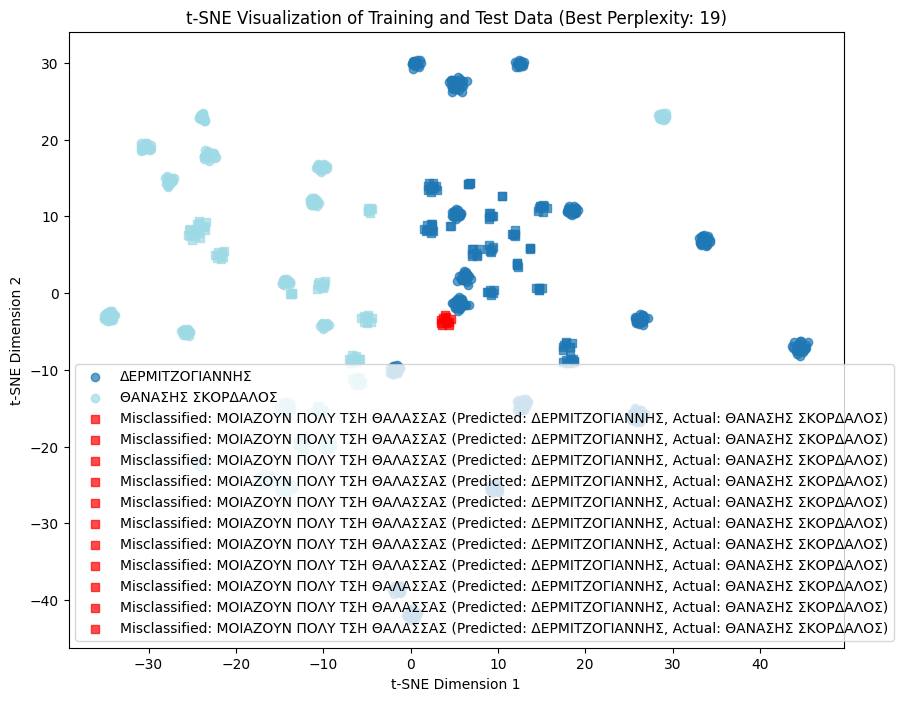

In [143]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("extracted_data.csv")

# Separate numerical data: from the beginning to the 4th column before the end
numerical_data = data.iloc[:, :-4]

# Separate artist category: the 3rd column from the end
artist_category = data.iloc[:, -3]

# Get song names
song_names = data["song_name"] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test, song_names_train, song_names_test = train_test_split(
    numerical_data, artist_category, song_names, test_size=0.3, random_state=41
)

# Define a function to perform t-SNE and SVM with early stopping
def train_model(perplexity):
    """
    Trains an SVM model on t-SNE transformed data with early stopping.

    Args:
        perplexity: Perplexity value for t-SNE.

    Returns:
        accuracy: Test accuracy of the trained model.
        X_train_2d: t-SNE transformed training data
        X_test_2d: t-SNE transformed test data
        y_pred: Predicted labels for the test data
    """

    # Perform t-SNE dimensionality reduction on training data
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=41)
    X_train_2d = tsne.fit_transform(X_train)

    # Perform t-SNE dimensionality reduction on test data (using the same parameters)
    tsne_test = TSNE(n_components=2, perplexity=perplexity, random_state=41)
    X_test_2d = tsne_test.fit_transform(X_test)

    # Define parameter grid for GridSearchCV
    param_grid = {'C': [1]}  # Adjust C values as needed

    # Create SVM model
    svm_model = SVC(kernel='sigmoid') 

    # Perform GridSearchCV with early stopping (using cross-validation within GridSearchCV)
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5) 
    grid_search.fit(X_train_2d, y_train)

    # Predict labels for the test data
    y_pred = grid_search.best_estimator_.predict(X_test_2d)

    # Evaluate model performance on the test set
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, X_train_2d, X_test_2d, y_pred

# Define perplexity values to evaluate
perplexity_values = list(range(1, 30)) 


# Evaluate models with different perplexities
best_accuracy = 0
best_perplexity = None
best_X_train_2d = None
best_X_test_2d = None
best_y_pred = None 

for perplexity in perplexity_values:
    accuracy, X_train_2d, X_test_2d, y_pred = train_model(perplexity)
    print(f"Perplexity: {perplexity}, Test Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_perplexity = perplexity
        best_X_train_2d = X_train_2d
        best_X_test_2d = X_test_2d
        best_y_pred = y_pred 

print(f"Best Perplexity: {best_perplexity}, Best Accuracy: {best_accuracy}")

# Visualize Training Data with Best Perplexity
plt.figure(figsize=(10, 8))
unique_artists = np.unique(y_train)
num_colors = len(unique_artists)
color_map = plt.cm.get_cmap('tab20', num_colors)

for i, artist in enumerate(unique_artists):
    artist_indices = y_train == artist
    plt.scatter(best_X_train_2d[artist_indices, 0], best_X_train_2d[artist_indices, 1], 
                color=color_map(i / num_colors), label=artist, alpha=0.7)

# Plot Test Data on the same figure
for i, (x, y, pred, actual, song_name) in enumerate(zip(best_X_test_2d[:, 0], best_X_test_2d[:, 1], best_y_pred, y_test, song_names_test)):
    if pred == actual:
        plt.scatter(x, y, color=color_map(np.where(unique_artists == actual)[0][0]), marker='s', alpha=0.7) 
    else:
        plt.scatter(x, y, color='red', marker='s', alpha=0.7, label=f"Misclassified: {song_name} (Predicted: {pred}, Actual: {actual})") 

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title(f"t-SNE Visualization of Training and Test Data (Best Perplexity: {best_perplexity})")
plt.legend()
plt.show()